In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df0 = pd.read_csv('./datasets/건물_30년 초과.csv')
df0

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
1,영등포구,2016-01-02,55.90,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,33,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,28500
2,서대문구,2016-01-03,66.12,6,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,47,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,15200
3,강남구,2016-01-04,25.27,3,1918.760010,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1190.35,99.6,177.148845,0.14,1074.70,0.7,51000
4,강동구,2016-01-04,41.62,2,1918.760010,0.34,26.9,9894,1.77,2.03,...,1.50,33,83.3,1190.35,99.6,177.148845,0.14,1074.70,0.7,41000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65821,서대문구,2022-12-30,54.02,2,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,48,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,53459
65822,노원구,2022-12-31,41.30,12,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,39000
65823,송파구,2022-12-31,100.82,1,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,185000
65824,강남구,2022-12-31,76.79,2,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,43,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,184000


In [23]:
df0.drop(columns = ['건물연식'], inplace= True)

### Train/Test Split

In [24]:
# Train : 2016-2020
# Test : 2021-2022

df0['계약일'] = pd.to_datetime(df0['계약일'])

In [25]:
train_df = df0.loc[df0['계약일'] < '2021']

In [26]:
test_df = df0.loc[df0['계약일'] >= '2021']

### feature & target split

In [27]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [28]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

### Scaling
    - Features -MinMax
    - Target - Log

In [29]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [30]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

53765    5.439333
53766    5.250420
53767    4.995635
53768    5.129690
53769    5.332438
           ...   
65821    4.728021
65822    4.591065
65823    5.267172
65824    5.264818
65825    5.139879
Name: 물건금액(만원), Length: 12061, dtype: float64

# OLS - Scaling 후

## OLS_1

In [31]:
# OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2773.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:31:53   Log-Likelihood:                 3544.3
No. Observations:               53765   AIC:                            -7051.
Df Residuals:                   53746   BIC:                            -6882.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0186      0.029    173.613      0.000       4.962       5.075
건물면적(㎡)               1.7636      0.010    185.104      0.000       1.745       1.782
층                     0.0477      0.006      7.515      0.000       0.035       0.060
KOSPI종가              -0.0652      0.023     -2.889      0.004      -0.109      -0.021
Fed기준금리              -0.2057      0.014    -15.015      0.000      -0.233      -0.179
국제유가(Dubai)($/배럴)     0.1923      0.014     14.054      0.000       0.165       0.219
부동산거래량               -0.0128      0.007     -1.895      0.058      -0.026       0.000
국고채5년(평균)            -0.5104      0.070     -7.324      0.000      -0.647      -0.374
국고채10년(평균)            0.5408      0.054     10.071      0.000       0.436       0.646
회사채3년(평균)             0.1527      0.020      7.804      0.000       0.114       0.191
CD91물(평균)            -0.2076      0.029     -7.047      0.000      -0.265      -0.150
BOK기준금리              -0.0938      0.025     -3.802      0.000      -0.142      -0.045
GDP대비가계부채비율          -0.3118      0.022    -14.404      0.000      -0.354      -0.269
환율종가                  0.0327      0.012      2.792      0.005       0.010       0.056
선행지수순환변동치             0.2359      0.016     14.377      0.000       0.204       0.268
EPU                  -0.0462      0.008     -5.908      0.000      -0.062      -0.031
장단기금리spread          -0.4029      0.031    -12.928      0.000      -0.464      -0.342
금값종가                 -0.0359      0.021     -1.673      0.094      -0.078       0.006
LTV                  -0.4154      0.007    -61.307      0.000      -0.429      -0.402
==============================================================================
Omnibus:                      385.492   Durbin-Watson:                   1.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.004
Skew:                          -0.056   Prob(JB):                     3.17e-60
Kurtosis:                       2.668   Cond. No.                         199.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 금값종가 컬럼 삭제

In [32]:
X_scaled.drop(columns = ['금값종가'], inplace=True)

## OLS_2

In [33]:
# OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2936.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:31:53   Log-Likelihood:                 3542.9
No. Observations:               53765   AIC:                            -7050.
Df Residuals:                   53747   BIC:                            -6890.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0056      0.028    179.781      0.000       4.951       5.060
건물면적(㎡)               1.7638      0.010    185.134      0.000       1.745       1.782
층                     0.0476      0.006      7.499      0.000       0.035       0.060
KOSPI종가              -0.0739      0.022     -3.365      0.001      -0.117      -0.031
Fed기준금리              -0.1988      0.013    -15.220      0.000      -0.224      -0.173
국제유가(Dubai)($/배럴)     0.1946      0.014     14.298      0.000       0.168       0.221
부동산거래량               -0.0118      0.007     -1.747      0.081      -0.025       0.001
국고채5년(평균)            -0.5432      0.067     -8.122      0.000      -0.674      -0.412
국고채10년(평균)            0.5675      0.051     11.069      0.000       0.467       0.668
회사채3년(평균)             0.1561      0.019      8.019      0.000       0.118       0.194
CD91물(평균)            -0.1986      0.029     -6.857      0.000      -0.255      -0.142
BOK기준금리              -0.0928      0.025     -3.763      0.000      -0.141      -0.044
GDP대비가계부채비율          -0.3339      0.017    -19.501      0.000      -0.368      -0.300
환율종가                  0.0317      0.012      2.714      0.007       0.009       0.055
선행지수순환변동치             0.2398      0.016     14.763      0.000       0.208       0.272
EPU                  -0.0442      0.008     -5.721      0.000      -0.059      -0.029
장단기금리spread          -0.3972      0.031    -12.822      0.000      -0.458      -0.337
LTV                  -0.4166      0.007    -61.828      0.000      -0.430      -0.403
==============================================================================
Omnibus:                      384.402   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.138
Skew:                          -0.055   Prob(JB):                     4.88e-60
Kurtosis:                       2.669   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 부동산거래량 컬럼 삭제

In [34]:
X_scaled.drop(columns = ['부동산거래량'], inplace=True)

## OLS_3

In [35]:
# OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     3119.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:31:53   Log-Likelihood:                 3541.3
No. Observations:               53765   AIC:                            -7049.
Df Residuals:                   53748   BIC:                            -6897.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.0103      0.028    180.770      0.000       4.956       5.065
건물면적(㎡)               1.7638      0.010    185.126      0.000       1.745       1.782
층                     0.0476      0.006      7.502      0.000       0.035       0.060
KOSPI종가              -0.0822      0.021     -3.832      0.000      -0.124      -0.040
Fed기준금리              -0.1980      0.013    -15.169      0.000      -0.224      -0.172
국제유가(Dubai)($/배럴)     0.1892      0.013     14.276      0.000       0.163       0.215
국고채5년(평균)            -0.5374      0.067     -8.045      0.000      -0.668      -0.406
국고채10년(평균)            0.5688      0.051     11.095      0.000       0.468       0.669
회사채3년(평균)             0.1645      0.019      8.721      0.000       0.128       0.201
CD91물(평균)            -0.2060      0.029     -7.188      0.000      -0.262      -0.150
BOK기준금리              -0.0878      0.024     -3.584      0.000      -0.136      -0.040
GDP대비가계부채비율          -0.3359      0.017    -19.662      0.000      -0.369      -0.302
환율종가                  0.0285      0.012      2.466      0.014       0.006       0.051
선행지수순환변동치             0.2446      0.016     15.279      0.000       0.213       0.276
EPU                  -0.0401      0.007     -5.448      0.000      -0.055      -0.026
장단기금리spread          -0.4110      0.030    -13.715      0.000      -0.470      -0.352
LTV                  -0.4193      0.007    -63.861      0.000      -0.432      -0.406
==============================================================================
Omnibus:                      380.871   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.183
Skew:                          -0.055   Prob(JB):                     1.30e-59
Kurtosis:                       2.670   Cond. No.                         184.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_3

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [37]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.589557            건물면적(㎡)
1     4.533736                  층
2   119.448903            KOSPI종가
3    51.843654            Fed기준금리
4    65.418674  국제유가(Dubai)($/배럴)
5   951.217421          국고채5년(평균)
6   699.966329         국고채10년(평균)
7    93.283548          회사채3년(평균)
8   234.760389          CD91물(평균)
9   226.668070            BOK기준금리
10   65.980089        GDP대비가계부채비율
11   29.395242               환율종가
12   93.348477          선행지수순환변동치
13    5.434159                EPU
14  164.956898        장단기금리spread
15   17.127632                LTV


### 국고채5년(평균) 컬럼 삭제

In [38]:
X_scaled.drop(columns = ['국고채5년(평균)'], inplace=True)

## OLS_4

In [39]:
# OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     3319.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:31:54   Log-Likelihood:                 3509.0
No. Observations:               53765   AIC:                            -6986.
Df Residuals:                   53749   BIC:                            -6844.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1009      0.025    201.282      0.000       5.051       5.151
건물면적(㎡)               1.7655      0.010    185.242      0.000       1.747       1.784
층                     0.0471      0.006      7.418      0.000       0.035       0.060
KOSPI종가              -0.0918      0.021     -4.284      0.000      -0.134      -0.050
Fed기준금리              -0.2260      0.013    -17.951      0.000      -0.251      -0.201
국제유가(Dubai)($/배럴)     0.1966      0.013     14.865      0.000       0.171       0.223
국고채10년(평균)            0.2394      0.031      7.756      0.000       0.179       0.300
회사채3년(평균)             0.1267      0.018      6.931      0.000       0.091       0.162
CD91물(평균)            -0.2802      0.027    -10.320      0.000      -0.333      -0.227
BOK기준금리              -0.1746      0.022     -7.935      0.000      -0.218      -0.131
GDP대비가계부채비율          -0.3176      0.017    -18.746      0.000      -0.351      -0.284
환율종가                  0.0625      0.011      5.814      0.000       0.041       0.084
선행지수순환변동치             0.2694      0.016     17.144      0.000       0.239       0.300
EPU                  -0.0527      0.007     -7.318      0.000      -0.067      -0.039
장단기금리spread          -0.5678      0.023    -24.933      0.000      -0.612      -0.523
LTV                  -0.4121      0.007    -63.318      0.000      -0.425      -0.399
==============================================================================
Omnibus:                      410.296   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.096
Skew:                          -0.054   Prob(JB):                     4.55e-63
Kurtosis:                       2.659   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_4

In [40]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.524690            건물면적(㎡)
1     4.533503                  층
2   117.400429            KOSPI종가
3    44.180620            Fed기준금리
4    65.261628  국제유가(Dubai)($/배럴)
5   203.004512         국고채10년(평균)
6    88.115438          회사채3년(평균)
7   232.213593          CD91물(평균)
8   202.324432            BOK기준금리
9    57.367419        GDP대비가계부채비율
10   20.726293               환율종가
11   88.871805          선행지수순환변동치
12    5.383878                EPU
13  113.805462        장단기금리spread
14   15.268245                LTV


### CD91물(평균) 컬럼 삭제

In [41]:
X_scaled.drop(columns = ['CD91물(평균)'], inplace=True)

## OLS_5

In [42]:
# OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     3542.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:32:32   Log-Likelihood:                 3455.8
No. Observations:               53765   AIC:                            -6882.
Df Residuals:                   53750   BIC:                            -6748.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9573      0.021    233.816      0.000       4.916       4.999
건물면적(㎡)               1.7688      0.010    185.520      0.000       1.750       1.788
층                     0.0462      0.006      7.260      0.000       0.034       0.059
KOSPI종가              -0.0281      0.021     -1.368      0.171      -0.068       0.012
Fed기준금리              -0.2503      0.012    -20.222      0.000      -0.275      -0.226
국제유가(Dubai)($/배럴)     0.1959      0.013     14.794      0.000       0.170       0.222
국고채10년(평균)            0.0415      0.024      1.714      0.087      -0.006       0.089
회사채3년(평균)             0.1889      0.017     10.935      0.000       0.155       0.223
BOK기준금리              -0.2907      0.019    -15.354      0.000      -0.328      -0.254
GDP대비가계부채비율          -0.3062      0.017    -18.095      0.000      -0.339      -0.273
환율종가                  0.0761      0.011      7.127      0.000       0.055       0.097
선행지수순환변동치             0.3344      0.014     23.199      0.000       0.306       0.363
EPU                  -0.0409      0.007     -5.747      0.000      -0.055      -0.027
장단기금리spread          -0.5108      0.022    -23.098      0.000      -0.554      -0.467
LTV                  -0.4098      0.007    -62.934      0.000      -0.423      -0.397
==============================================================================
Omnibus:                      404.392   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.066
Skew:                          -0.047   Prob(JB):                     9.27e-62
Kurtosis:                       2.658   Cond. No.                         71.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### KOSPI종가 컬럼 삭제

In [43]:
X_scaled.drop(columns = ['KOSPI종가'], inplace=True)

## OLS_6

In [44]:
# OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     3814.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:32:56   Log-Likelihood:                 3454.8
No. Observations:               53765   AIC:                            -6882.
Df Residuals:                   53751   BIC:                            -6757.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9478      0.020    247.009      0.000       4.909       4.987
건물면적(㎡)               1.7692      0.010    185.638      0.000       1.751       1.788
층                     0.0461      0.006      7.253      0.000       0.034       0.059
Fed기준금리              -0.2493      0.012    -20.176      0.000      -0.273      -0.225
국제유가(Dubai)($/배럴)     0.1930      0.013     14.764      0.000       0.167       0.219
국고채10년(평균)            0.0490      0.024      2.076      0.038       0.003       0.095
회사채3년(평균)             0.1801      0.016     11.230      0.000       0.149       0.212
BOK기준금리              -0.2914      0.019    -15.397      0.000      -0.328      -0.254
GDP대비가계부채비율          -0.3126      0.016    -19.203      0.000      -0.344      -0.281
환율종가                  0.0808      0.010      8.008      0.000       0.061       0.101
선행지수순환변동치             0.3215      0.011     29.407      0.000       0.300       0.343
EPU                  -0.0393      0.007     -5.601      0.000      -0.053      -0.026
장단기금리spread          -0.5056      0.022    -23.210      0.000      -0.548      -0.463
LTV                  -0.4080      0.006    -63.936      0.000      -0.420      -0.395
==============================================================================
Omnibus:                      405.514   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.420
Skew:                          -0.046   Prob(JB):                     7.77e-62
Kurtosis:                       2.658   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_6

In [28]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.456164            건물면적(㎡)
1     4.521870                  층
2    42.859491            Fed기준금리
3    63.687506  국제유가(Dubai)($/배럴)
4   138.272141         국고채10년(평균)
5    66.249614          회사채3년(평균)
6    46.840604            BOK기준금리
7    33.465876        GDP대비가계부채비율
8    19.103924               환율종가
9    43.063053          선행지수순환변동치
10    5.329216                EPU
11  112.685788        장단기금리spread
12   13.967792                LTV


### 국고채10년(평균) 컬럼 삭제

In [45]:
X_scaled.drop(columns = ['국고채10년(평균)'], inplace=True)

## OLS_7

In [46]:
# OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4131.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:34:18   Log-Likelihood:                 3452.7
No. Observations:               53765   AIC:                            -6879.
Df Residuals:                   53752   BIC:                            -6764.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.9368      0.019    255.499      0.000       4.899       4.975
건물면적(㎡)               1.7691      0.010    185.622      0.000       1.750       1.788
층                     0.0461      0.006      7.242      0.000       0.034       0.059
Fed기준금리              -0.2414      0.012    -20.531      0.000      -0.264      -0.218
국제유가(Dubai)($/배럴)     0.1916      0.013     14.674      0.000       0.166       0.217
회사채3년(평균)             0.2007      0.013     15.938      0.000       0.176       0.225
BOK기준금리              -0.2801      0.018    -15.450      0.000      -0.316      -0.245
GDP대비가계부채비율          -0.3220      0.016    -20.598      0.000      -0.353      -0.291
환율종가                  0.0842      0.010      8.458      0.000       0.065       0.104
선행지수순환변동치             0.3327      0.010     34.978      0.000       0.314       0.351
EPU                  -0.0377      0.007     -5.400      0.000      -0.051      -0.024
장단기금리spread          -0.4868      0.020    -24.564      0.000      -0.526      -0.448
LTV                  -0.4067      0.006    -64.032      0.000      -0.419      -0.394
==============================================================================
Omnibus:                      406.628   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.931
Skew:                          -0.046   Prob(JB):                     6.02e-62
Kurtosis:                       2.657   Cond. No.                         63.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_7

In [47]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     5.426474            건물면적(㎡)
1     4.519525                  층
2    34.827797            Fed기준금리
3    63.473026  국제유가(Dubai)($/배럴)
4    34.718271          회사채3년(평균)
5    46.117818            BOK기준금리
6    16.271789        GDP대비가계부채비율
7    19.059099               환율종가
8    32.804633          선행지수순환변동치
9     5.300936                EPU
10   99.811584        장단기금리spread
11   13.944510                LTV


### 장단기금리spread 컬럼 삭제

In [48]:
X_scaled.drop(columns = ['장단기금리spread'], inplace=True)

## OLS_8

In [49]:
# OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     4403.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:34:31   Log-Likelihood:                 3152.6
No. Observations:               53765   AIC:                            -6281.
Df Residuals:                   53753   BIC:                            -6174.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.7186      0.017    273.465      0.000       4.685       4.752
건물면적(㎡)               1.7861      0.010    186.867      0.000       1.767       1.805
층                     0.0440      0.006      6.876      0.000       0.031       0.057
Fed기준금리              -0.2353      0.012    -19.908      0.000      -0.258      -0.212
국제유가(Dubai)($/배럴)     0.0726      0.012      5.958      0.000       0.049       0.097
회사채3년(평균)            -0.0727      0.006    -12.260      0.000      -0.084      -0.061
BOK기준금리              -0.0250      0.015     -1.675      0.094      -0.054       0.004
GDP대비가계부채비율          -0.1555      0.014    -10.975      0.000      -0.183      -0.128
환율종가                  0.0550      0.010      5.530      0.000       0.035       0.074
선행지수순환변동치             0.1776      0.007     24.827      0.000       0.164       0.192
EPU                  -0.0269      0.007     -3.840      0.000      -0.041      -0.013
LTV                  -0.3749      0.006    -59.952      0.000      -0.387      -0.363
==============================================================================
Omnibus:                      440.578   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.122
Skew:                          -0.039   Prob(JB):                     1.84e-65
Kurtosis:                       2.644   Cond. No.                         49.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### BOK기준금리 컬럼 삭제

In [50]:
X_scaled.drop(columns = ['BOK기준금리'], inplace=True)

## OLS_9

In [51]:
# OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     4842.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:35:08   Log-Likelihood:                 3151.2
No. Observations:               53765   AIC:                            -6280.
Df Residuals:                   53754   BIC:                            -6183.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6960      0.011    435.009      0.000       4.675       4.717
건물면적(㎡)               1.7870      0.010    187.247      0.000       1.768       1.806
층                     0.0441      0.006      6.904      0.000       0.032       0.057
Fed기준금리              -0.2497      0.008    -30.790      0.000      -0.266      -0.234
국제유가(Dubai)($/배럴)     0.0733      0.012      6.015      0.000       0.049       0.097
회사채3년(평균)            -0.0729      0.006    -12.309      0.000      -0.085      -0.061
GDP대비가계부채비율          -0.1349      0.007    -19.088      0.000      -0.149      -0.121
환율종가                  0.0594      0.010      6.202      0.000       0.041       0.078
선행지수순환변동치             0.1809      0.007     26.288      0.000       0.167       0.194
EPU                  -0.0261      0.007     -3.732      0.000      -0.040      -0.012
LTV                  -0.3732      0.006    -60.476      0.000      -0.385      -0.361
==============================================================================
Omnibus:                      435.388   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.923
Skew:                          -0.038   Prob(JB):                     9.08e-65
Kurtosis:                       2.645   Cond. No.                         27.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_9

In [52]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor            Feature
0    5.169694            건물면적(㎡)
1    4.482138                  층
2   20.184097            Fed기준금리
3   48.247056  국제유가(Dubai)($/배럴)
4    9.138850          회사채3년(평균)
5    9.865650        GDP대비가계부채비율
6   14.284610               환율종가
7   15.525152          선행지수순환변동치
8    5.287848                EPU
9   12.262136                LTV


### 국제유가(Dubai)($/배럴) 컬럼 삭제

In [53]:
X_scaled.drop(columns = ['국제유가(Dubai)($/배럴)'], inplace=True)

## OLS_10

In [54]:
# OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     5373.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:35:55   Log-Likelihood:                 3133.1
No. Observations:               53765   AIC:                            -6246.
Df Residuals:                   53755   BIC:                            -6157.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7184      0.010    465.358      0.000       4.699       4.738
건물면적(㎡)         1.7890      0.010    187.506      0.000       1.770       1.808
층               0.0441      0.006      6.887      0.000       0.032       0.057
Fed기준금리        -0.2118      0.005    -41.513      0.000      -0.222      -0.202
회사채3년(평균)      -0.0629      0.006    -11.059      0.000      -0.074      -0.052
GDP대비가계부채비율    -0.1255      0.007    -18.202      0.000      -0.139      -0.112
환율종가            0.0363      0.009      4.135      0.000       0.019       0.054
선행지수순환변동치       0.1793      0.007     26.064      0.000       0.166       0.193
EPU            -0.0181      0.007     -2.634      0.008      -0.032      -0.005
LTV            -0.3696      0.006    -60.157      0.000      -0.382      -0.358
==============================================================================
Omnibus:                      436.266   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.666
Skew:                          -0.035   Prob(JB):                     1.03e-64
Kurtosis:                       2.644   Cond. No.                         22.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_10

In [55]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    5.039915      건물면적(㎡)
1    4.475609            층
2    4.564013      Fed기준금리
3    8.284143    회사채3년(평균)
4    7.449231  GDP대비가계부채비율
5   13.294197         환율종가
6   15.449556    선행지수순환변동치
7    4.961866          EPU
8   10.742910          LTV


### 선행지수순환변동치 컬럼 삭제

In [56]:
X_scaled.drop(columns = ['선행지수순환변동치'], inplace=True)

## OLS_11

In [57]:
# OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     5885.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:36:36   Log-Likelihood:                 2795.5
No. Observations:               53765   AIC:                            -5573.
Df Residuals:                   53756   BIC:                            -5493.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7979      0.010    493.064      0.000       4.779       4.817
건물면적(㎡)         1.8147      0.010    190.035      0.000       1.796       1.833
층               0.0452      0.006      7.017      0.000       0.033       0.058
Fed기준금리        -0.2087      0.005    -40.665      0.000      -0.219      -0.199
회사채3년(평균)       0.0018      0.005      0.355      0.723      -0.008       0.012
GDP대비가계부채비율    -0.1220      0.007    -17.586      0.000      -0.136      -0.108
환율종가           -0.1004      0.007    -14.164      0.000      -0.114      -0.086
EPU            -0.0267      0.007     -3.869      0.000      -0.040      -0.013
LTV            -0.3042      0.006    -53.904      0.000      -0.315      -0.293
==============================================================================
Omnibus:                      499.266   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.485
Skew:                          -0.021   Prob(JB):                     3.46e-71
Kurtosis:                       2.622   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 회사채3년(평균) 컬럼 삭제

In [58]:
X_scaled.drop(columns = ['회사채3년(평균)'], inplace=True)

## OLS_12

In [59]:
# OLS_12
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     6726.
Date:                Sat, 01 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:37:54   Log-Likelihood:                 2795.4
No. Observations:               53765   AIC:                            -5575.
Df Residuals:                   53757   BIC:                            -5504.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7989      0.009    516.878      0.000       4.781       4.817
건물면적(㎡)         1.8148      0.010    190.073      0.000       1.796       1.834
층               0.0452      0.006      7.018      0.000       0.033       0.058
Fed기준금리        -0.2084      0.005    -41.288      0.000      -0.218      -0.198
GDP대비가계부채비율    -0.1215      0.007    -17.875      0.000      -0.135      -0.108
환율종가           -0.1014      0.006    -15.795      0.000      -0.114      -0.089
EPU            -0.0275      0.006     -4.260      0.000      -0.040      -0.015
LTV            -0.3041      0.006    -53.985      0.000      -0.315      -0.293
==============================================================================
Omnibus:                      498.790   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.207
Skew:                          -0.021   Prob(JB):                     3.97e-71
Kurtosis:                       2.622   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIF_12

In [60]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    4.656687      건물면적(㎡)
1    4.459104            층
2    2.762913      Fed기준금리
3    4.531910  GDP대비가계부채비율
4    8.315581         환율종가
5    4.483135          EPU
6    2.738823          LTV


# LinearRegression

## CV - R2, MSE

In [61]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기  
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [62]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.49765,           Validation Score_r2 = 0.25147
      Train Score_mse = 0.05151,           Validation Score_mse = 0.06147


Fold 2: Train Score_r2 = 0.49349,           Validation Score_r2 = 0.31519
      Train Score_mse = 0.05172,           Validation Score_mse = 0.05884


Fold 3: Train Score_r2 = 0.48689,           Validation Score_r2 = 0.36833
      Train Score_mse = 0.04874,           Validation Score_mse = 0.07246


Fold 4: Train Score_r2 = 0.45847,           Validation Score_r2 = 0.49631
      Train Score_mse = 0.05311,           Validation Score_mse = 0.05162


Fold 5: Train Score_r2 = 0.4171,           Validation Score_r2 = 0.54609
      Train Score_mse = 0.05653,           Validation Score_mse = 0.04809


CV 평균 R2 : 0.3955
CV 평균 MSE : 0.0585


# 평가지표 train and test 시각화

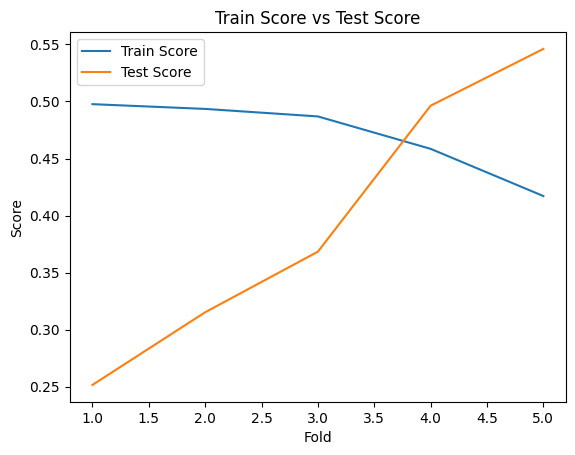

In [63]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

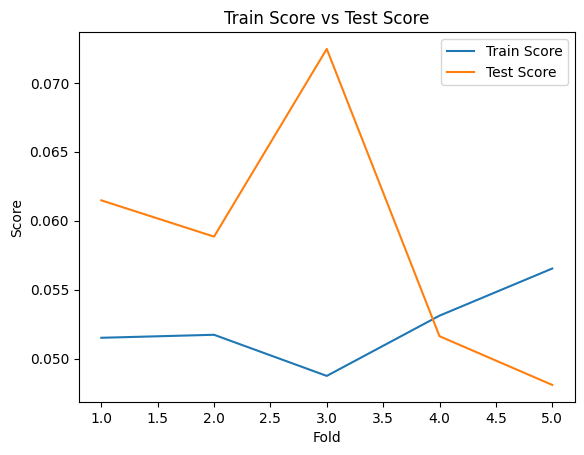

In [64]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

# Model 확정
- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 네 번째로 확정

In [65]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.060, RMSE :  0.246, MAE: 0.246
Variance score :  0.395




In [66]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= cv_results['estimator'][3].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
건물면적(㎡),1.754770
층,0.051548
EPU,-0.034870
환율종가,-0.107798
GDP대비가계부채비율,-0.130066
Fed기준금리,-0.219072
LTV,-0.312535


# Ridge & Lasso

## Ridge

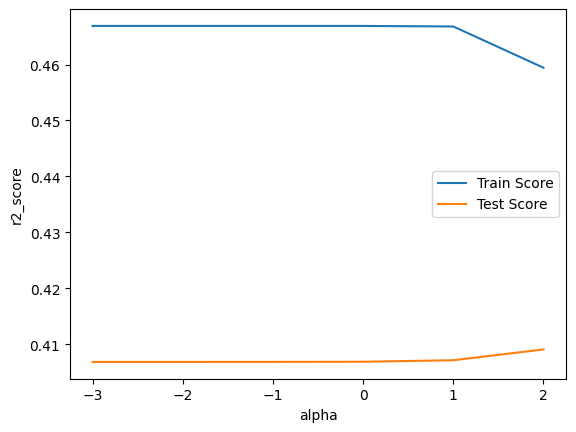

In [68]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- alpha 값이 변해도 큰 차이가 없어 기본값 alpha = 1.0으로 진행

# CV

In [69]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.49765,           Validation Score_r2 = 0.25221
      Train Score_mse = 0.05151,           Validation Score_mse = 0.06141


Fold 2: Train Score_r2 = 0.49349,           Validation Score_r2 = 0.31526
      Train Score_mse = 0.05172,           Validation Score_mse = 0.05884


Fold 3: Train Score_r2 = 0.48689,           Validation Score_r2 = 0.36794
      Train Score_mse = 0.04874,           Validation Score_mse = 0.0725


Fold 4: Train Score_r2 = 0.45847,           Validation Score_r2 = 0.49609
      Train Score_mse = 0.05311,           Validation Score_mse = 0.05164


Fold 5: Train Score_r2 = 0.4171,           Validation Score_r2 = 0.54585
      Train Score_mse = 0.05653,           Validation Score_mse = 0.04811


CV 평균 R2 : 0.3955
CV 평균 MSE : 0.0585


# 평가지표 train and test 차이 시각화

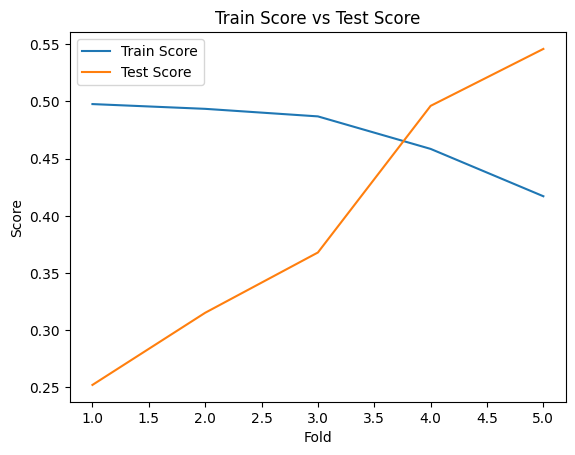

In [70]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [71]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.46690574968639975
0.4068575095095375


In [72]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.059, RMSE :  0.243, MAE: 0.243
Variance score :  0.407




In [79]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][3].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.060, RMSE :  0.245, MAE: 0.245
Variance score :  0.395




In [80]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = cv_results['estimator'][3].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
건물면적(㎡),1.751259
층,0.051750
EPU,-0.034885
환율종가,-0.107797
GDP대비가계부채비율,-0.130146
Fed기준금리,-0.218996
LTV,-0.312540


In [75]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-0.14875893655973016


In [76]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True])

___

# 잔차항 검정

In [77]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
#matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

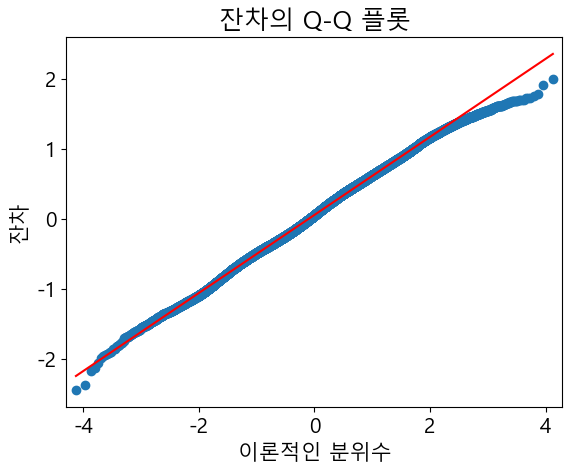

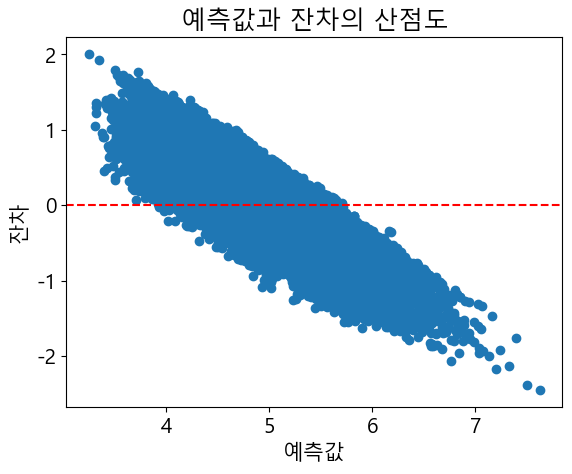

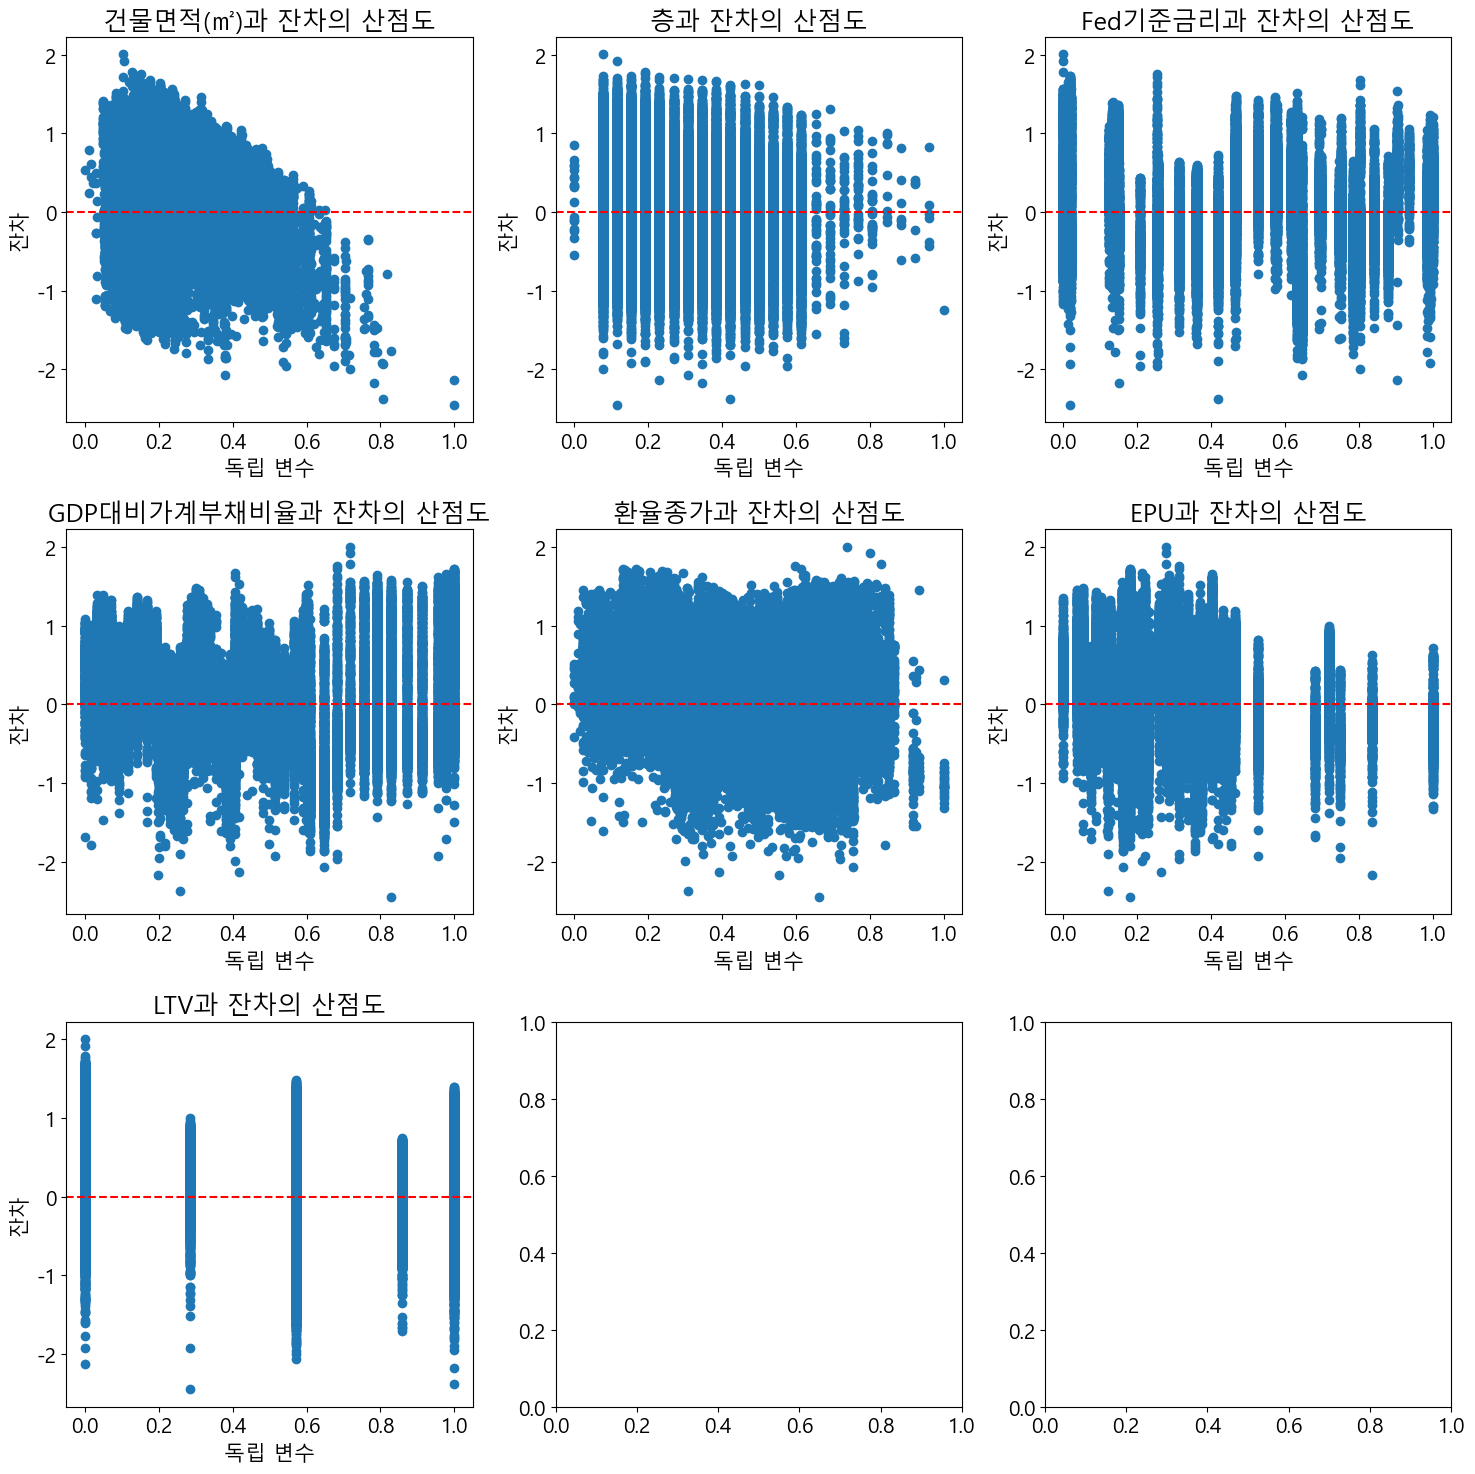

In [78]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()